# Cubic Interpolation

### Overall Intention
To produce a function that maintains the certain essence of a "shape", which is to be applied to the "shape" of the spine later on.

For earlier tests it could be on something *simpler* (i.e. more easily definable) like one period of a sine wave.

Then, trying to adjust the cubic function to map onto this will be pretty difficult. Then reading whether it has deviated from a certain range (either absolute (if $x\gt5$) or relative (if ($x_1, y_1$) translated $[1, 2]$ i.e. if one point has moved away such that the entire function no longer maps onto its intended output. This may include machine learning techniques)) would, **maybe**, be easier.

### Deadlines
**Deadline: 13/07/25**
- Solve a cubic spline equation by hand and derive applying this to an equation
- Simple model of cubic spline that can work dynamically
- Testing (and understanding how this can be gamed towards fitting a specific shape)

*Going to learn the maths behind this relatively quickly but focus on applying this onto code (and have the rest of it learnt more implicitly). Need to first get one problem set completed fully.*

**Deadline: 20/07/25**
- Some pretty detailed research into the spine to see what it means to have a function fit onto the spine
- Testing with the vector points from the IMUs to produce spline models

#### Test
*Below is a test of using a scipy module for cubic splines to work automatically (with only a rudimentary understanding at this point).*

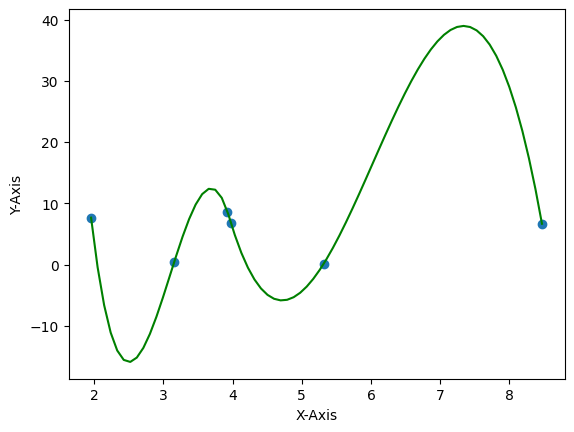

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import random

# 1D array of data points
x = [random.uniform(0,10) for i in range(6)]
y = [random.uniform(0,10) for i in range(6)]

# cubic function
func_cubic = interp1d(x,y, kind="cubic")

x_interp = np.linspace(np.min(x), np.max(x), 70)

plt.scatter(x, y)
plt.plot(x_interp, func_cubic(x_interp), "green")
plt.ylabel("Y-Axis")
plt.xlabel("X-Axis")
plt.show()

**Notes**:
*An issue with this is the case of overfitting, with certain values (as shown above), where the function over-exaggerates a curve of a function. I am also unsure how this could work with 3D vectors (but I hope it will make it more)*

### Depression
There is a lot to learn for this, the assumption for this is parametrising the main function of S(t) into x(t), y(t) and z(t).

Specifying this so that it can be generalised to other patients currently doesn't seem possible. Much, much more consideration needs to be taken to be this.

**List of Sources**:
*Below are the list of the sources that have contributed to this dread:*

https://claude.ai/share/e749c836-d49c-4fa5-ba44-c4146913eab9
https://math.stackexchange.com/questions/577641/how-to-calculate-interpolating-splines-in-3d-space
https://en.wikipedia.org/wiki/B-spline
https://en.wikipedia.org/wiki/Tricubic_interpolation

https://pmc.ncbi.nlm.nih.gov/articles/PMC5298576/
    *This explores an existing method of reading in IMU data into a spline - there are equations there. Thus, I will cite this research and understand it.*

*N.B. Read all of the sources to find out what is relevant and be able to explain the types of interpolating functions as I later have to develop some way of using these curves and making them like the spine!!*

------------
-------------

### Matrix Test
*Want to be able to display matrix notation in markdown in order to demonstrate my process for learning cubic spline calculations*

https://www.upyesp.org/posts/makrdown-vscode-math-notation/

**Simple 3x3 Matrix**:
$$\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}$$

**2x2 Matrix Multiplication**:
$$
\begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix}
\begin{bmatrix} b_{11} & b_{12} \\ b_{21} & b_{22} \end{bmatrix}
=
\begin{bmatrix} a_{11}b_{11} + a_{12}b_{21} & a_{11}b_{12} + a_{12}b_{22} \\ a_{21}b_{11} + a_{22}b_{21} & a_{21}b_{12} + a_{22}b_{22} \end{bmatrix}
$$

### Cubic Spline Calculations
***More sources to help out with context before jumping into a problem to solve:***
https://math.stackexchange.com/questions/602976/cubic-spline-interpolation-practice


#### Question: Find the cubic spline that maps onto (0,0), (1, 3) and (2, 4)

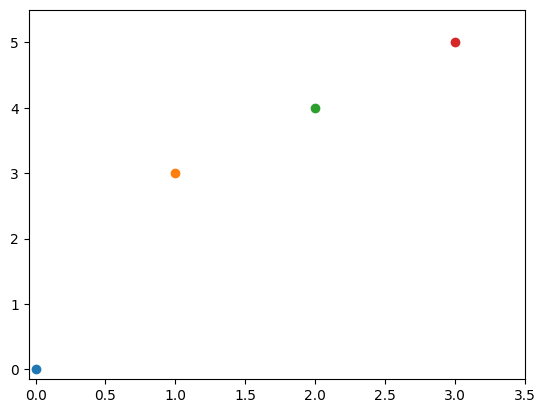

In [ ]:
# plot these points
import matplotlib.pyplot as plt

plt.scatter(0,0)
plt.scatter(1,3)
plt.scatter(2,4)
plt.scatter(3,5)

plt.xlim(-0.05, 3.5)
plt.ylim(-0.15, 5.5)

plt.show()

*For the calculation, I will be using a natural cubic spline*

**Set-up**:

$$S_0(x) = a_0 + b_0(x) + c_0(x^2) + d_0(x^3)$$

$$S_1(x) = a_1 + b_1(x-1) + c_1(x-1)^2 + d_1(x-1)^3$$

$$S_2(x) = a_2 + b_2(x-2) + c_2(x-2)^2 + d_2(x-2)^3$$

##### System of Equations:
There are twelve unknowns to solve:

*Linear equations*

$$S_0(0) = 0 \implies a_0 = 0$$
$$[1]: S_0(1) \mid b_0 + c_0 + d_0 = 3$$

$$S_1(1) = 3 \implies a_1 = 3 $$
$$[2]: S_1(2) \mid  b_1 + c_1 + d_1 = 1$$

$$S_2(2) = 4 \implies a_2 = 4 $$
$$[3]: S_2(3) \mid b_2 + c_2 + d_2 = 1$$


*Equating derivatives*

$$[4]: S_0'(1) = S_1'(1) \\ \implies b_0 + 2c_0 + 3d_0 = b_1 $$

$$[5]: S_1'(2) = S_2'(2) \\ \implies b_1 + 2c_1 + 3d_1 = b_2$$

$$[6]: S_0''(1) = S_1''(1) \\ \implies 2c_0 + 6d_0 = 2c_1$$
$$[7]: S_1''(2) = S_2''(2) \\ \implies 2c_1 + 6d_1 = 2c_2$$


*Boundary conditions*

$$S_0''(0) = 0 \\ \implies c_0 = 0 $$
$$[8]: S_2''(3) = 0 \\ \implies 2c_2 + 12d_2 = 0$$

*There are eight unknowns, and 8 equations.*
##### Final Matrix Form:
The final matrix will be an 8x8 matrix, with each column in the form:
$$
\begin{bmatrix}
b_0 & d_0 & b_1 & c_1 & d_1 & b_2 & c_2 & d_2\\
\end{bmatrix} \\\
\\
$$


$
A =
\begin{bmatrix}
1 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 1 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 1 & 1\\
1 & 3 & -1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 2 & 3 & -1 & 0 & 0\\
0 & 6 & 0 & -2 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 2 & 6 & 0 & -2 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 2 & 12\\
\end{bmatrix}
\\
$


$
\vec{w}=
\begin{bmatrix}
b_0 \cr
d_0 \cr
b_1 \cr
c_1 \cr
d_1 \cr
b_2 \cr
c_2 \cr
d_2 \cr
\end{bmatrix}
$

$
B =
\begin{bmatrix}
3 \\
1 \\
1 \\
0 \\
0 \\
0 \\
0 \\
0 \\
\end{bmatrix}\\
\\
$

$$A\vec{w} = B$$
$$\vec{w} = A^{-1}B$$
*Then the systems of equations can be solved, where A is the matrix from the system of linear equations and B are the outputs from that.*

#### Computation
*Solving this matrix (through Gaussian elimination) by hand is unnecessary and not something I will do for the rest of the project (although I will learn how it works in case I can find ways of optimising my work). Thus, I will now be using python modules (to try and understand both NumPy and SciPy since they both have their uses) and progressing faster to the intended deadlines.*

               
b_0 =  3.529412
d_0 = -0.529412
b_1 =  1.941176
c_1 = -1.588235
d_1 =  0.647059
b_2 =  0.705882
c_2 =  0.352941
d_2 = -0.058824
[ 3.52941176 -0.52941176  1.94117647 -1.58823529  0.64705882  0.70588235
  0.35294118 -0.05882353]


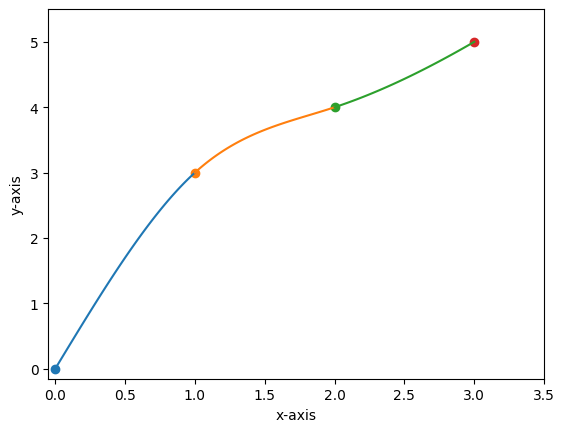

In [ ]:
import numpy as np
import scipy as scp
import pandas as pd
import matplotlib.pyplot as plt

# test out the inverse matrices of both (seeing how long they took as well?) and displaying the final matrix as a pd.DataFrame thing (unless it does it automatically)

A = np.array([
    [1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 1],
    [1, 3, -1, 0, 0, 0, 0, 0],
    [0, 0, 1, 2, 3, -1, 0, 0],
    [0, 6, 0, -2, 0, 0, 0, 0],
    [0, 0, 0, 2, 6, 0, -2, 0],
    [0, 0, 0, 0, 0, 0, 2, 12]
], dtype=float)

B = np.array(
[3, 1, 1, 0, 0, 0, 0, 0]
)

A_inverse = np.linalg.inv(A)

vect_w = np.matmul(A_inverse, B)
w = pd.DataFrame(vect_w, index = ["b_0 =", "d_0 =", "b_1 =", "c_1 =", "d_1 =", "b_2 =", "c_2 =", "d_2 ="], columns = [""])
print(w)

print(vect_w)

# defining all constants
a_0 = 0
b_0 = vect_w[0]
c_0 = 0
d_0 = vect_w[1]
a_1 = 3
b_1 = vect_w[2]
c_1 = vect_w[3]
d_1 = vect_w[4]
a_2 = 4
b_2 = vect_w[5]
c_2 = vect_w[6]
d_2 = vect_w[7]

# plotting piecewise equations
x_0 = np.linspace(0, 1, 100)
y_0 = [a_0 + b_0*(i) + c_0*((i)**2) + d_0*((i)**3) for i in x_0]
x_1 = np.linspace(1, 2, 100)
y_1 = [a_1 + b_1*(i-1) + c_1*((i-1)**2) + d_1*((i-1)**3) for i in x_1]
x_2 = np.linspace(2, 3, 100)
y_2 = [a_2 + b_2*(i-2) + c_2*((i-2)**2) + d_2*((i-2)**3) for i in x_2]

# original points
plt.scatter(0,0)
plt.scatter(1,3)
plt.scatter(2,4)
plt.scatter(3,5)

# cubic splines
plt.plot(x_0, y_0)
plt.plot(x_1, y_1)
plt.plot(x_2, y_2)

# limits
plt.xlim(-0.05, 3.5)
plt.ylim(-0.15, 5.5)

plt.xlabel("x-axis")
plt.ylabel("y-axis")

plt.show()

# now that I have w values, need to fit back into cubic functions
# with that I can check whether my cubic functions are correct and what do with them

# """To learn:"""
# - parametrised functions (kinda like with the spine (20 deg at a certain point), needs research after initial tests are done)
# - parametrised function (S(t) made up of x(t), y(t), z(t))

#### Evaluation
*This was too cumbersome to solve in one go, and I do not understand how this can be done quickly to be packaged in quickly updated code.*

Thus, here are things for improvement:
- Look at this substack (on general form of solving the equations): https://math.stackexchange.com/questions/602976/cubic-spline-interpolation-practice
- Understand what is meant by parametrisation (wrt splines) & how to force a spline to fit a certain shape
    - This is applied to the context of interpolated across 3D vectors wrt time
- 3D space source: https://math.stackexchange.com/questions/577641/how-to-calculate-interpolating-splines-in-3d-space
- https://paulbourke.net/miscellaneous/interpolation/: a much more comprehensive guide of interpolation more generally, I will apply the findings there into the 3D stuff I need
- Have an easier input/output relationship that can parse points in much easier and deal with them in a manner than can still be finetuned

# Parametrisation
Before moving onto the more efficienct way of coding, I would like to demonstrate how I want the code to be initially as this will help to maintain willpower for these designs.

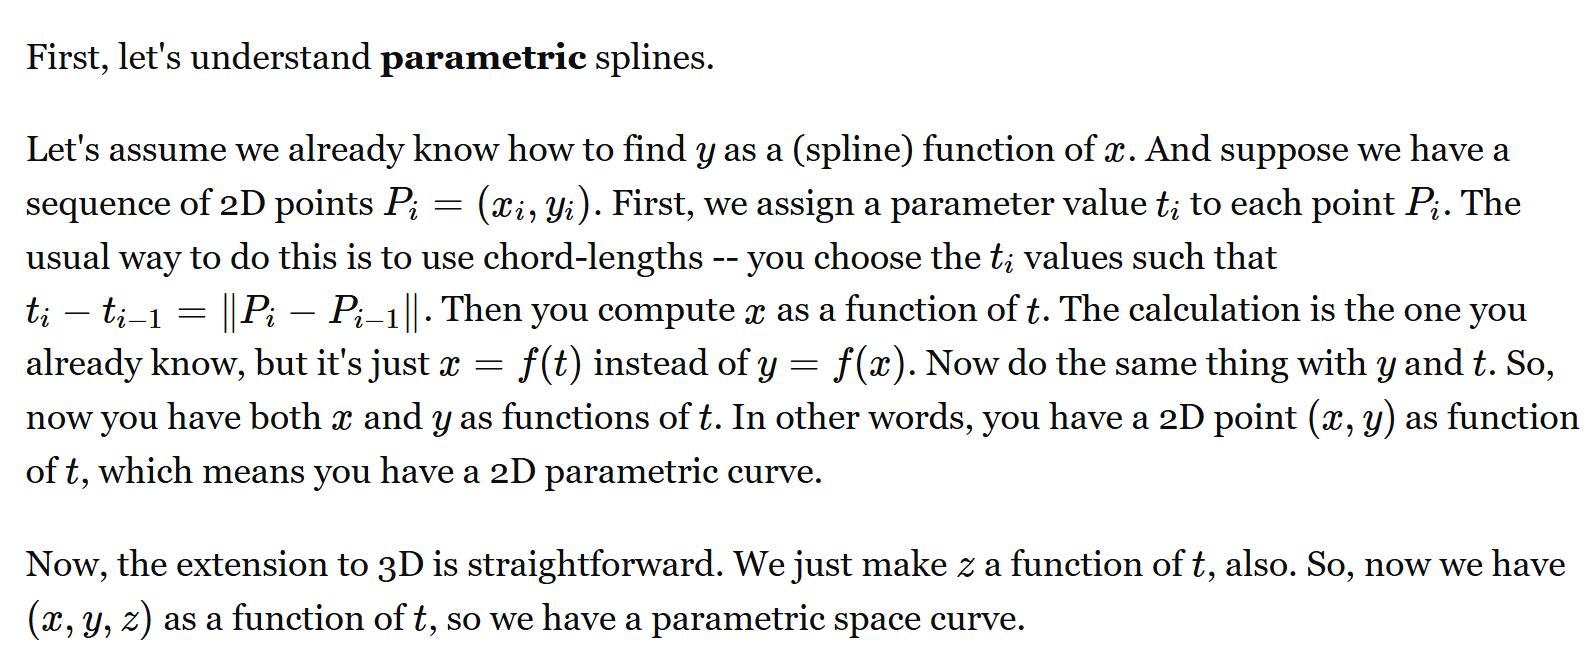

[[ 8  2  3]
 [ 4  6  6]
 [ 7 19  9]
 [10 11 12]
 [13 16 15]
 [16 17 18]] 

t_values: [np.float64(8.774964387392123), np.float64(18.155795907038982), np.float64(40.31431571319932), np.float64(59.41928888774212), np.float64(84.91438645570605), np.float64(114.3931924016734)]


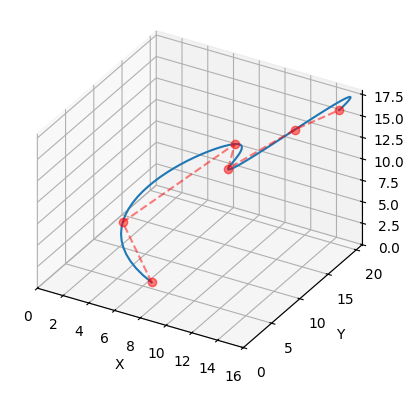

In [2]:
# modules
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# formatting

## I would like all the vector points to be inputted into one long matrix
## This would be after the gyroscope and accelerometer data has been cleaned

### these will get continuously updated as inputs from the serial
### but here they are fixed numbers

vector_1 = np.array([8, 2, 3])
vector_2 = np.array([4, 6, 6])
vector_3 = np.array([7, 19, 9])
vector_4 = np.array([10, 11, 12])
vector_5 = np.array([13, 16, 15])
vector_6 = np.array([16, 17, 18])

### matrix, A
a_matrix = np.array([vector_1, vector_2, vector_3, vector_4, vector_5, vector_6])
print(f"{a_matrix} \n")

## to isolate each of the axes (x, y, z), I can extract the columns from the
## matrix in order to do the parametrisation by t of each of them (this can help
## me to decide whether cubic splines are actually the best way forward; are th-
## -ey customisable?)

column_1 = a_matrix[:, 0] # x - axis
column_2 = a_matrix[:, 1] # y - axis
column_3 = a_matrix[:, 2] # z - axis

# interpolation functions

## writing an algorithm that can interpolate across n-number dimensions
      # t is the parameter that is used as the base for this all, and is determ-
      # -ined by the magnitude of the displacements from the other points.
      # Effectively, this is forward kinematics, which can hopefully be optimis-
      # -ed if this were to work in real time.

## would like part of this algorithm to add recursively to new variable until t-
## the length of the vectors but since this is fixed, there is no need.

## below are the t values, indexed by points
def forward_kinematics(matrix, index=0, results=None):
  if results is None:
    results = [0]

  if index >= len(matrix):
    return results

  results.append(results[-1] + np.linalg.norm(a_matrix[index]))
  return forward_kinematics(matrix, index + 1, results)

t_values = forward_kinematics(a_matrix)
t_values.pop(0) # removes the initial 0 in the list
print(f"t_values: {t_values}")

# rather than hand solving, I will be using the in-built, scipy functions

# solve x = f(t)
x = interp1d(t_values, column_1, kind='cubic')

# solve y = f(t)
y = interp1d(t_values, column_2, kind='cubic')

# solve z = f(t)
z = interp1d(t_values, column_3, kind='cubic')

# plot this finally in matplotlib orthographic view
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


t_min, t_max = t_values[0], t_values[-1]
t_inputs = np.linspace(t_min, t_max, 100)

plt.plot(x(t_inputs), y(t_inputs), z(t_inputs),)
plt.plot(x(t_values), y(t_values), z(t_values),'o--', c='r', alpha=0.5)

ax.set_xlim(0, max(x(t_inputs)))
ax.set_ylim(0, max(y(t_inputs)))
ax.set_zlim(0, max(z(t_inputs)))

ax.set_proj_type('ortho')
plt.show()

# THEN, do this dynamically with updating points (randomly but in similar range)
# THEN, mix this with forward kinematics stuff
# THEN, do this with IMUs (so only three)
# THEN, research into how to fit cubic spline onto spine model to make a more a-
# -ccurate digital twin

# HOW CAN THIS DATA BE INTERPRETED?
# WHAT ABOUT CHECKING IF NEW FUNCTION IS IN A RANGE
# likely function approximation on this parametrised function since precisely d-
# -eriving a Cartesian equation will be unnecessary (opportunity to learn the T-
# -aylor Series early on and try my hand at function approximation (numpy will
# handle it)).


**Timing Test**:

I had a fear that many of these calculations won't be able to run at a rate such that real time splines could be shown in the digital twin; I was very wrong.

In [ ]:
import numpy as np
import timeit

A = np.random.random((8, 8))
B = np.random.random((8, 8))

time_taken = timeit.timeit(lambda: np.matmul(A, B), number=10000)
print(f"Average time: {time_taken/10000 * 1e6:.2f} microseconds")

Average time: 1.97 microseconds


**Fusion: Cubic Interp + Forward Kinematics File**

*This is the construction of a dynamic model for this I can then parse in serial data (but effectively I know that whatever data that is inputted can be cleaned).*

Below will be some pseudocode to quickly run down the changes from the above

normalised_position: [array([ 0.85583735,  0.35177781, -0.37920284]), array([ 0.66485241,  1.03507802, -1.0839195 ]), array([ 2.2096049 ,  1.67297563, -0.79714081]), array([ 4.20369947,  3.75576251, -2.80023339]), array([ 8.87244996,  7.15576623, -5.12035882]), array([ 17.37402307,  13.28395504, -10.63398696])]


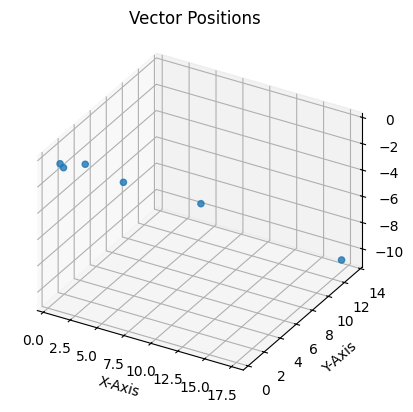

'\n# animation function\ndef animate(i):\n    print(f"{i}")\n\n    ax.clear()\n\n    # read the updated lists into here, probably using embedded loops to save me grief: \n\n    ## updated linear interpolation (of length-6 kinematic chain)\n    ## use loop rather than the cumbersome manual writing of the quiver updates (and their addition)\n\n    ## updated plt.plot() for the cubic intepolation\n\n    ax.set_xlim([-lim, lim])\n    ax.set_ylim([-lim, lim])\n    ax.set_zlim([-lim, lim])\n\n    ax.set_xlabel("X-Axis")\n    ax.set_ylabel("Y-Axis")\n    ax.set_zlabel("Z-Axis")\n    ax.set_title(\'Vector Positions\')\n\nani = FuncAnimation(fig, animate, frames=len(""),cache_frame_data=False, interval = 500) # increased interval time\nax.set_proj_type(\'ortho\')\n\nplt.show()\n'

In [7]:
# modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.interpolate import interp1d
import random

# PSEUDOCODE

"""
For each sensor, there will be a measured and known direction of the normals of these sensors.
This can later be used for the mapping of the spinal surface for further imperfections.
"""

# Fused accelerometer and gyroscope data will indicate the local vector direction of sensors
g = 9.81
gg = 2 * g

vector_tilt_list = [(random.uniform(-gg, gg), random.uniform(-gg, gg), random.uniform(-gg, gg)) for i in range(6)] # The vector direction of tilt
linear_distance = [0.23, 0.08, 0.12, 0.19, 0.08] # measured shortest distance between sensors

normalised_tilt_matrix = np.matrix([vector_tilt_list[i]/np.linalg.norm(vector_tilt_list[i]) for i in range(len(vector_tilt_list))])


# Position data
def forward_kinematics(matrix, index=0, results=None):
  if results is None:
    results = []

  if index >= len(matrix):
    return results

  if len(results) == 0:
    cumulative_pos = np.array(matrix[index]).flatten()

  else:
    cumulative_pos = np.sum(results, axis=0) + np.array(matrix[index]).flatten()

  results.append(cumulative_pos)
  return forward_kinematics(matrix, index + 1, results)

normalised_position = forward_kinematics(normalised_tilt_matrix)
print(f"normalised_position: {normalised_position}")

"""
Overlay dynamic linear & cubic interpolation.
The underlying measurment to get the position of sensors relative to each other should be questioned.

Solution(?): It will be the shortest distance measured (with a straight line ruler) along the y-axis to the next sensor...
...this would mean that it can be computed with relative ease since it is just a simple transformation (relative to the base sensor).
"""

"""
Plot axes
"""

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

"""
lim = 10 # change to appropriate boundary condition

ax.set_xlim([-lim, lim])
ax.set_ylim([-lim, lim])
ax.set_zlim([-lim, lim])
"""

ax.set_xlabel("X-Axis")
ax.set_ylabel("Y-Axis")
ax.set_zlabel("Z-Axis")
ax.set_title('Vector Positions')

positions = np.array(normalised_position)
ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], alpha=0.8)

ax.set_proj_type('ortho')
plt.show()

"""
# animation function
def animate(i):
    print(f"{i}")

    ax.clear()

    # read the updated lists into here, probably using embedded loops to save me grief:

    ## updated linear interpolation (of length-6 kinematic chain)
    ## use loop rather than the cumbersome manual writing of the quiver updates (and their addition)

    ## updated plt.plot() for the cubic intepolation

    ax.set_xlim([-lim, lim])
    ax.set_ylim([-lim, lim])
    ax.set_zlim([-lim, lim])

    ax.set_xlabel("X-Axis")
    ax.set_ylabel("Y-Axis")
    ax.set_zlabel("Z-Axis")
    ax.set_title('Vector Positions')

ani = FuncAnimation(fig, animate, frames=len(""),cache_frame_data=False, interval = 500) # increased interval time
ax.set_proj_type('ortho')

plt.show()
"""

# Curve-Fitting To Spine
*A major issue that I will tackle later but plan concurrently is how I can get these curves to reliably model out the spine and not just model out any curve. How this can be parametrised to the spine specifically.*


### Sources To Read
https://www.frontiersin.org/journals/bioengineering-and-biotechnology/articles/10.3389/fbioe.2023.1209472/full

-----------------



-----------------



-----------------




**To improve tomorrow**:
***Please review this tomorrow and edit it. This is the progression of the D.T. project.***
    
Once I have this working in an approximate manner in 3D (where given any vectors in 3D, there can be a cubic spline that forces into the shape of something desirable or spine-esque. This will likely require cubic spline equation to be parametrixed as $S(t) = x(t), y(t), z(t)$ - which isn't too bad), I will be quite content.
    
I will then try to set boundaries for each region of the spline stating that if the function $S_i(t)$ is too curved i.e. $S_i''(t) \geq n$, the function will output something in the terminal (it will visually turn red for example) and can handle these deviances - laying the foundation for the haptic motor response.

See if it is worth developing a neural network for approximating each side into one function (*it is not*) to handle the deviations more globally rather than iteratively throughout each area. If global, wherever the defiancy is will be sent to the sensor that is nearest (shortest path along function) to the haptic sensor and call it a day. However, other idea is probably better.

**Sketching this out, and still trying to visualise all my works -- can focus on design next week if I get this all done by Sunday which will be important since I need that pretty cleared up. Testing with reading in sensors can only be done when all theory is done so that needs to be accelerated to understand the errors.**

Doing research into where on the spine what happens is necessary, but should form a work placement or equivalent: Once this has been developed to some extent, do a batch email to a bunch of doctors and professionals for help - whilst continuing my work.

Need to focus on the aesthetics of this (and my other projects) as well (ESAT, blog post, olympiad, renders, portfolio, robotics) so being focused tomorrow on this (and the blog post) will be helpful to my future. I can also plan the other parts of this project (aesthetics & ergonomics (in specific detail), materials, more code testing, how will haptic motor fit).

